# Exploratory Data Analysis for Busara Mental Health Prediction Challenge. 

## Hypothesis

1.Married people are likely to suffer from depression

2.Female respondents are likely to suffer from depression.

3.Children are unlikely to suffer from depression.

4.Most people who do not have savings are likely to be depressed.

5.Youth are most likely to be depressed.

6.Females were more depressed than males.

7.Females who were not depressed were more than males.


In [1]:
# Load important packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 


In [2]:
# read dataset

data = pd.read_csv('/home/valentineiscoming/Pictures/project 2022 -Busara Mental Health Prediction Challenge/train.csv')

In [3]:
# read variable definitions

var_definitions = pd.read_csv('/home/valentineiscoming/Pictures/project 2022 -Busara Mental Health Prediction Challenge/Variable_explanations.csv')

var_definitions

,name,detail
0,surveyid,Individual Identifier
1,village,Village Identifier
2,survey_date,Date of Interview (days since Jan1 of first year)
3,femaleres,Female respondent
4,age,Age (respondent)
...,...,...
70,saved_mpesa,Saved money using M-Pesa
71,amount_saved_mpesa,Amount saved using M-Pesa
72,early_survey,Psychology survey in 1st wave (dummy)
73,depressed,Meets epidemiological threshold for moderate d...


In [4]:
# print shape 

print('train data shape :', data.shape)

train data shape : (1143, 75)


In [5]:
# view five rows of dataset

data.head() 

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [6]:
# view columns

list(data.columns) 

['surveyid',
 'village',
 'survey_date',
 'femaleres',
 'age',
 'married',
 'children',
 'hhsize',
 'edu',
 'hh_children',
 'hh_totalmembers',
 'cons_nondurable',
 'asset_livestock',
 'asset_durable',
 'asset_phone',
 'asset_savings',
 'asset_land_owned_total',
 'asset_niceroof',
 'cons_allfood',
 'cons_ownfood',
 'cons_alcohol',
 'cons_tobacco',
 'cons_med_total',
 'cons_med_children',
 'cons_ed',
 'cons_social',
 'cons_other',
 'ent_wagelabor',
 'ent_ownfarm',
 'ent_business',
 'ent_nonagbusiness',
 'ent_employees',
 'ent_nonag_revenue',
 'ent_nonag_flowcost',
 'ent_farmrevenue',
 'ent_farmexpenses',
 'ent_animalstockrev',
 'ent_total_cost',
 'fs_adskipm_often',
 'fs_adwholed_often',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'fs_enoughtom',
 'fs_sleephun',
 'med_expenses_hh_ep',
 'med_expenses_sp_ep',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'med_vacc_newborns',
 'med_

In [7]:
# information of variables

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1143 non-null   int64  
 1   village                  1143 non-null   int64  
 2   survey_date              1143 non-null   object 
 3   femaleres                1143 non-null   int64  
 4   age                      1143 non-null   float64
 5   married                  1143 non-null   int64  
 6   children                 1143 non-null   int64  
 7   hhsize                   1143 non-null   int64  
 8   edu                      1143 non-null   int64  
 9   hh_children              1143 non-null   int64  
 10  hh_totalmembers          809 non-null    float64
 11  cons_nondurable          1143 non-null   float64
 12  asset_livestock          1143 non-null   float64
 13  asset_durable            1143 non-null   float64
 14  asset_phone             

In [8]:
# checking missing values

print('missing values:', data.isnull().sum())

missing values: surveyid              0
village               0
survey_date           0
femaleres             0
age                   0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 75, dtype: int64


## Univariate Analysis

In [9]:
# view the target

data['depressed'].value_counts()

0    950
1    193
Name: depressed, dtype: int64

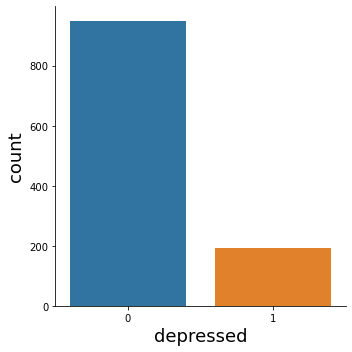

In [10]:
# explore target distribution

sns.catplot(x="depressed", kind="count", data= data)


where:
    1- number of people depressed
    0- number of people not depressed
    
    count -number of surved people
    
Most people surved are not depressed

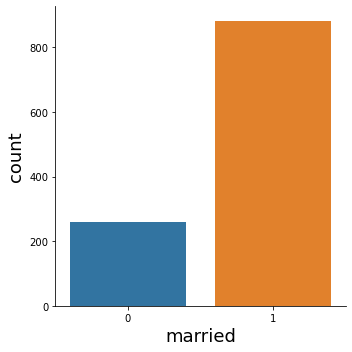

In [11]:
# explore married distribution

sns.catplot(x="married", kind="count", data=data)

where:
    1- number of people married
    0- number of people not married
    
    count -number of surved people

Most married people were surveyed.


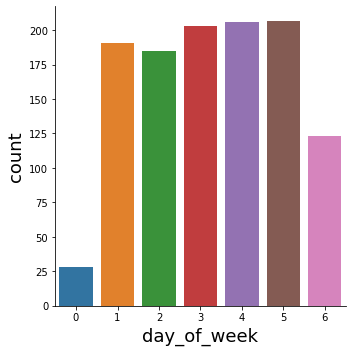

In [12]:
# Explore day of week

sns.catplot(x="day_of_week", kind="count", data=data)

where:
    0 - 6 = represents days of the week from monday to sunday
    
    count -number of surved people
    
The sixth day of the week recorded more than the first day.  

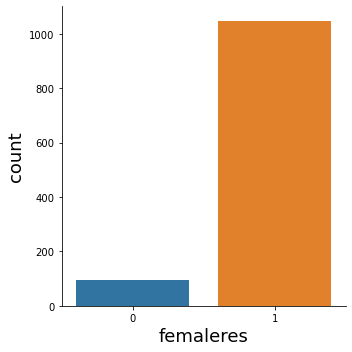

In [13]:
# Explore femaleres distribution

sns.catplot(x="femaleres", kind="count", data=data)

where:
    1- number of female respondents
    0- number of people not male respondents
    
    count -number of surved people
   
Females responded more than males.

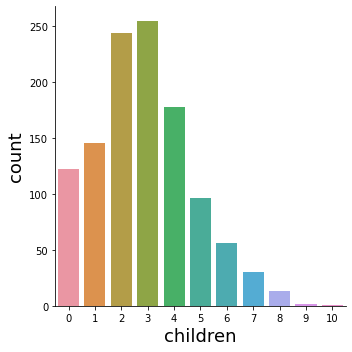

In [14]:
# Explore  children distribution

sns.catplot(x="children", kind="count", data=data)

where:
    
    count -number of surved people
    
Most surveyed number of children is 3 

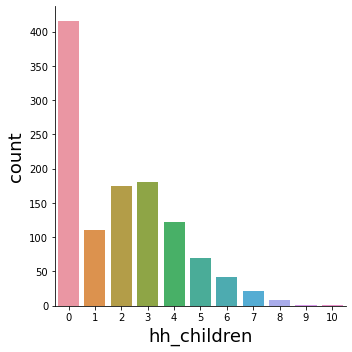

In [15]:
# Explore  hh_children distribution

sns.catplot(x="hh_children", kind="count", data=data)

Most of the people surveyed are the household with no children.

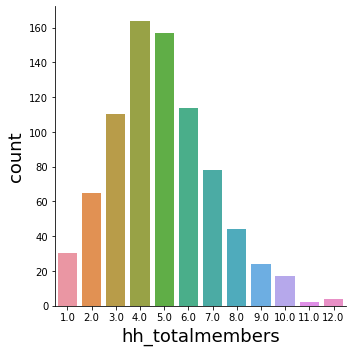

In [16]:
# Explore  hh_totalmembers distribution

#data['hh_totalmembers'] = np.round(data['hh_totalmembers'].values.astype(int))

sns.catplot(x="hh_totalmembers", kind="count", data=data)


The size of the household most surveyed had 4 total members.

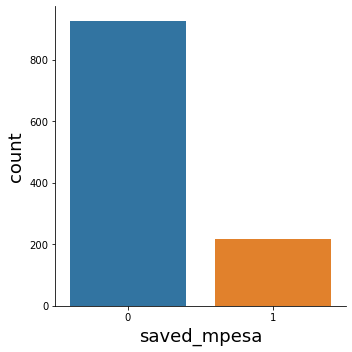

In [17]:
# saved_mpesa distribution

sns.catplot(x="saved_mpesa", kind="count", data=data)

where: 1- number of people with saved_mpesa 0- number of people without saved_mpesa

count -number of surved people

Most of the people surveyed had no saved_mpesa. 

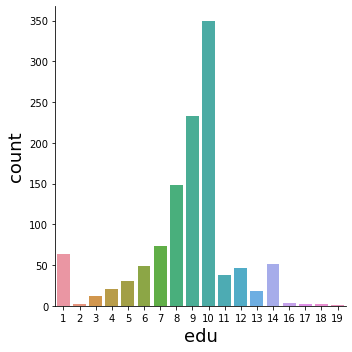

In [18]:
# edu distribution

sns.catplot(x="edu", kind="count", data=data)

count -number of surved people

Most surveyed people were with 10 years of education.

Text(0.5, 0, 'durable_investment')

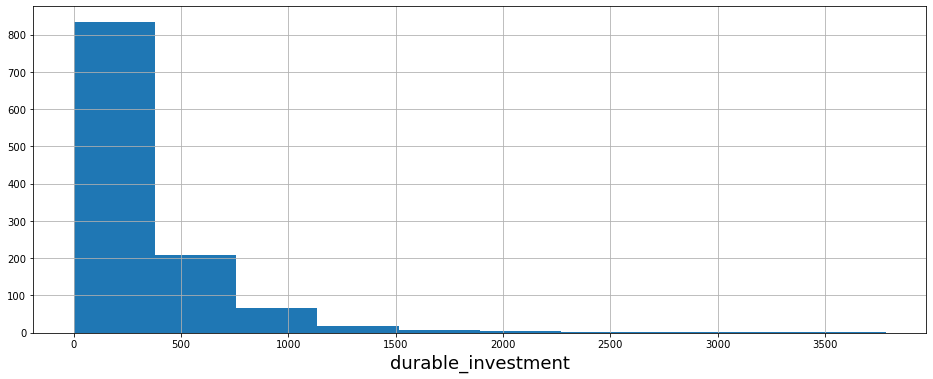

In [19]:
# durable_investment distribution

plt.figure(figsize=(16, 6))
data.durable_investment.hist() 
plt.xlabel('durable_investment')

Those who had durable investments were few compared to those with undurable investments

Text(0.5, 0, 'nondurable_investment')

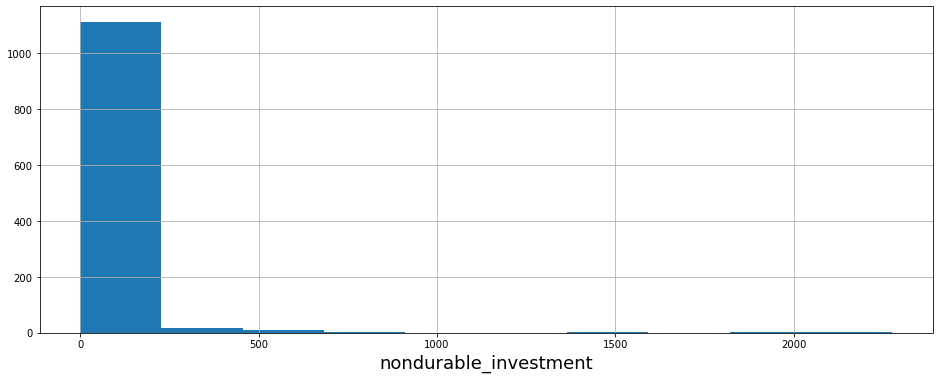

In [20]:
# non_durable_investment distribution

plt.figure(figsize=(16, 6))
data.nondurable_investment.hist() 
plt.xlabel('nondurable_investment')

Those who had nondurable investments were more compared to those with durable investments

Text(0.5, 0, 'age')

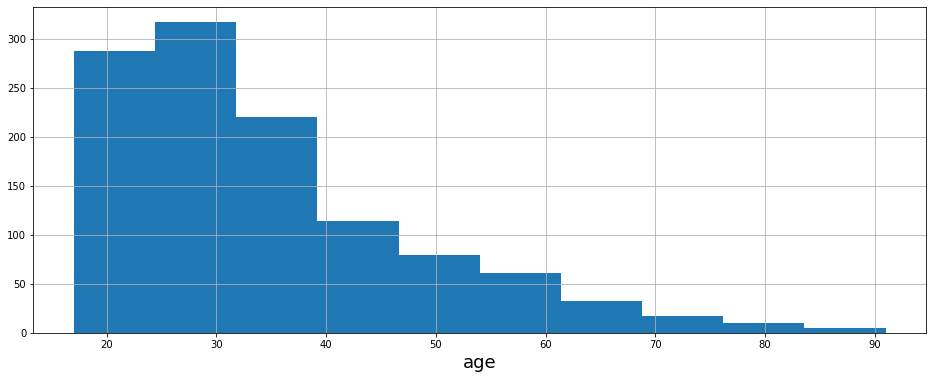

In [21]:
# age distribution

plt.figure(figsize=(16, 6))
data.age.hist() 
plt.xlabel('age')

Most of the age-group surveyed is between 25 to 32 years.

## Bivariate Analysis

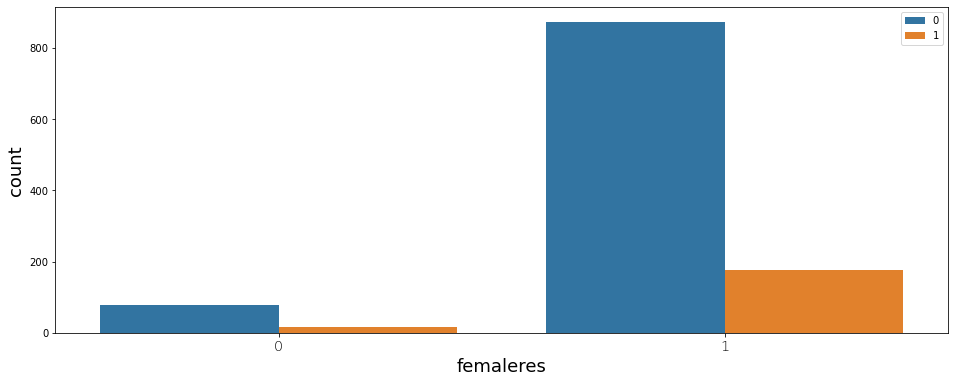

In [22]:
# femaleres vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('femaleres', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)
plt.legend()

where:
    0-maleres
    
    1-femaleres
    
Females were more depressed than males.

Females who were not depressed were more than males.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

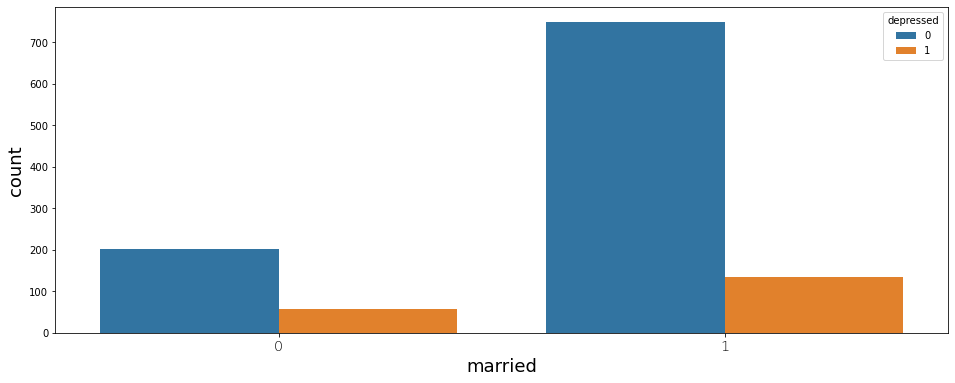

In [23]:
# married vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('married', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

where: 0-not married

1-married

Married are more depressed than not married.

Married who were not depressed were more than not married.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0')])

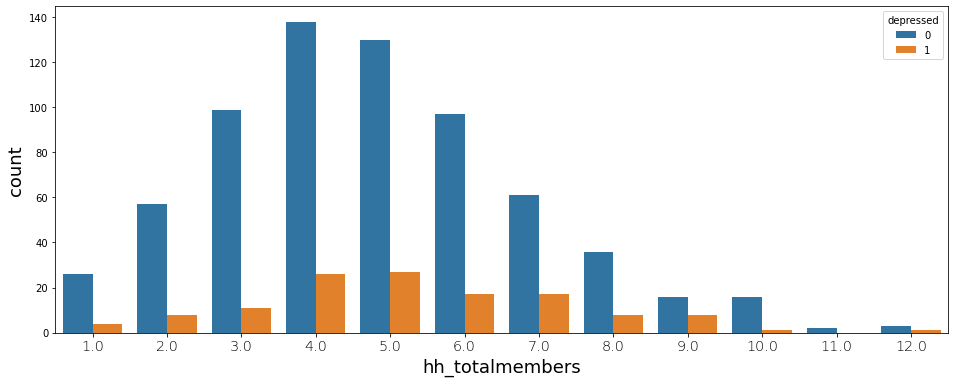

In [24]:
# hh_totalmembers vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('hh_totalmembers', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

The household size which had most people who were depressed was 5.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

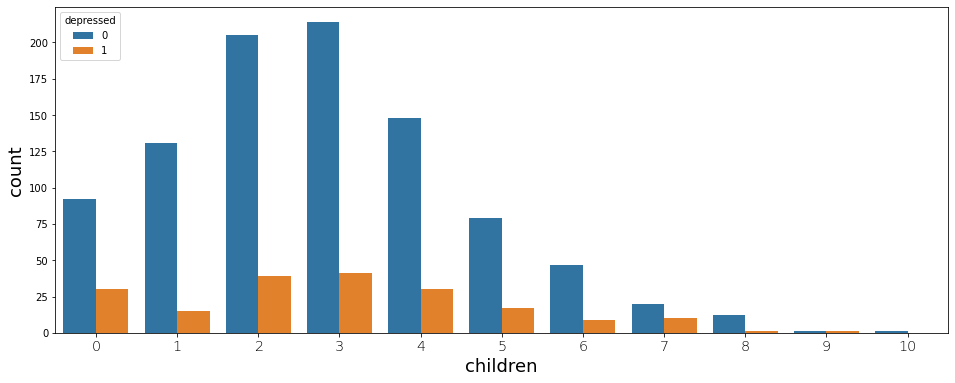

In [25]:
# children vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('children', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

Number of children who were depressed is 3

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

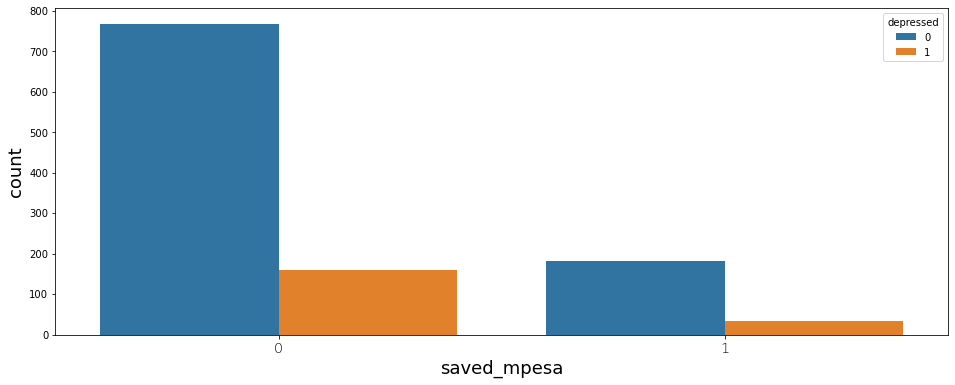

In [26]:
# saved_mpesa vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('saved_mpesa', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

where: 0-no saved_mpesa

1-saved_mpesa

Most people who were depressed had no saved_mpesa.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

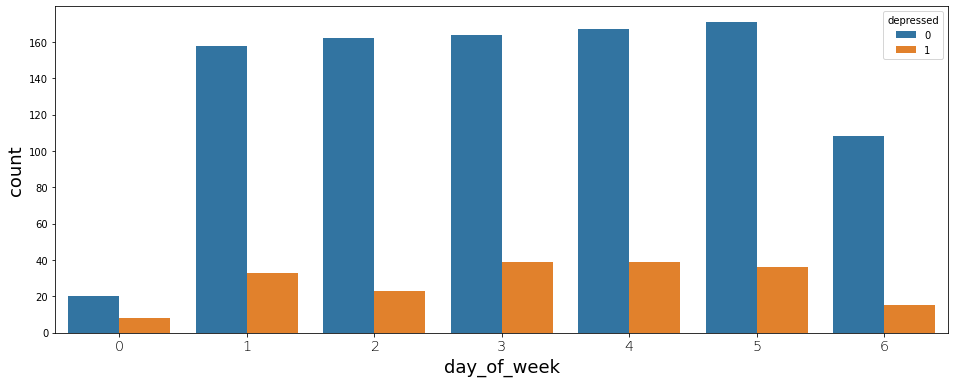

In [27]:
# day_of _week vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('day_of_week', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

The third day of the week surveyed more depressed people. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '16'),
  Text(15, 0, '17'),
  Text(16, 0, '18'),
  Text(17, 0, '19')])

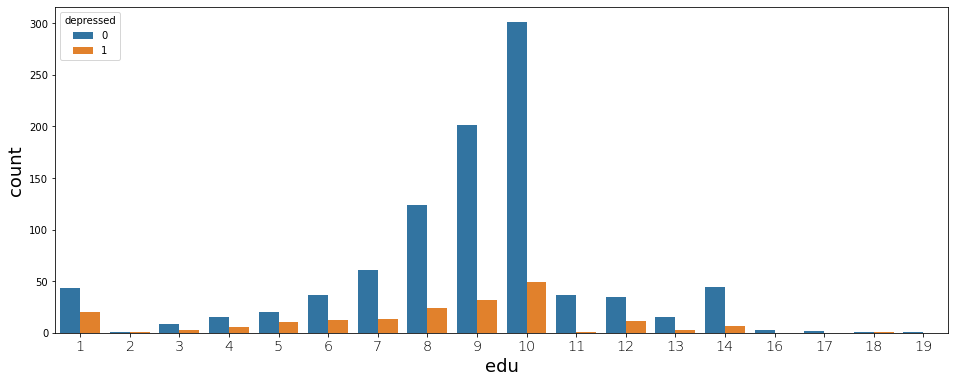

In [28]:
# edu vs depressed

plt.figure(figsize=(16, 6))
sns.countplot('edu', hue= 'depressed', data=data)
plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

## Results

1.Married people are likely to suffer from depression-True

2.Female respondents are likely to suffer from depression-True

3.Children are unlikely to suffer from depression-False

4.Most people who do not have savings are likely to be depressed-True

5.Most of the age group interviewed were youth-True

6.Females were more depressed than males-True

7.Females who were not depressed were more than males-True

# Feature Engineering

In [29]:
data

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,927,152,27-Dec-61,1,36.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,4
1139,1039,104,13-Sep-61,1,23.0,1,0,2,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,4
1140,428,54,23-Nov-61,1,28.0,1,5,7,10,5,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5
1141,23,3,05-Oct-61,1,33.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5


## Handling missing values

In [30]:
threshold = 0.7

data1  = data[data.columns[data.isnull().mean()<threshold]]

data1

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,927,152,27-Dec-61,1,36.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,4
1139,1039,104,13-Sep-61,1,23.0,1,0,2,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,4
1140,428,54,23-Nov-61,1,28.0,1,5,7,10,5,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5
1141,23,3,05-Oct-61,1,33.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5


In [31]:
list(data.loc[:,data.isnull().any()].columns)

['hh_totalmembers',
 'cons_alcohol',
 'cons_tobacco',
 'cons_med_children',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'fs_enoughtom',
 'fs_sleephun',
 'med_expenses_hh_ep',
 'med_expenses_sp_ep',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'med_u5_deaths',
 'ed_expenses',
 'ed_expenses_perkid',
 'ed_schoolattend',
 'ed_sch_missedpc',
 'ed_work_act_pc']

In [32]:
data = data.fillna(data.median())

In [33]:
#remove id feature 

data = data.drop('surveyid', axis=1)

data.shape 

(1143, 74)

In [34]:
# convert categorical features to numerical features
categorical_features=[]
for column in data.columns:
    if data[column].dtype == 'object':
        if data[column].nunique() > 2:
            categorical_features.append(column)
            print(column)

# One Hot Encoding conversion
data = pd.get_dummies(data, prefix_sep='_', columns = categorical_features)


#show the shape of the data
data.shape

survey_date


(1143, 253)

In [35]:
data

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,survey_date_30-May-60,survey_date_30-Nov-61,survey_date_30-Oct-60,survey_date_30-Oct-61,survey_date_30-Sep-60,survey_date_30-Sep-61,survey_date_31-Aug-61,survey_date_31-Dec-61,survey_date_31-May-60,survey_date_31-Oct-61
0,91,1,28.0,1,4,6,10,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,57,1,23.0,1,3,5,8,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,115,1,22.0,1,3,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,97,1,27.0,1,2,4,10,2,4.0,378.832920,...,0,0,0,0,0,0,0,0,0,0
4,42,0,59.0,0,4,6,10,4,6.0,258.671880,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,152,1,36.0,0,4,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1139,104,1,23.0,1,0,2,10,0,2.0,93.073326,...,0,0,0,0,0,0,0,0,0,0
1140,54,1,28.0,1,5,7,10,5,7.0,387.758820,...,0,0,0,0,0,0,0,0,0,0
1141,3,1,33.0,0,4,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

def pre_process(data):
    
    scaler = MinMaxScaler(feature_range=(0,1))
    
    data = scaler.fit_transform(data)

    return data

In [37]:
data

,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,...,survey_date_30-May-60,survey_date_30-Nov-61,survey_date_30-Oct-60,survey_date_30-Oct-61,survey_date_30-Sep-60,survey_date_30-Sep-61,survey_date_31-Aug-61,survey_date_31-Dec-61,survey_date_31-May-60,survey_date_31-Oct-61
0,91,1,28.0,1,4,6,10,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,57,1,23.0,1,3,5,8,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,115,1,22.0,1,3,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,97,1,27.0,1,2,4,10,2,4.0,378.832920,...,0,0,0,0,0,0,0,0,0,0
4,42,0,59.0,0,4,6,10,4,6.0,258.671880,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,152,1,36.0,0,4,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1139,104,1,23.0,1,0,2,10,0,2.0,93.073326,...,0,0,0,0,0,0,0,0,0,0
1140,54,1,28.0,1,5,7,10,5,7.0,387.758820,...,0,0,0,0,0,0,0,0,0,0
1141,3,1,33.0,0,4,5,9,0,5.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
